# Imports

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.datasets import make_classification
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression

from mlxtend.plotting import plot_decision_regions

# Bagging

## Example 1 (Heart Dataset) => Bagging

### Dataset

In [39]:
df1 = pd.read_csv('data/heart.csv')

y = df1['target'].values
X = df1.drop('target', axis=1)

In [40]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.20, random_state = 0)

scaler = StandardScaler()

X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

### Model (Bagging)

In [41]:
base1 = DecisionTreeClassifier(max_depth=3, random_state=42, ccp_alpha=0.01)
model = BaggingClassifier(base_estimator=base1, n_estimators=20, max_samples=50, random_state=42)

In [42]:
model.fit(X_train1, y_train1)

D:\anaconda\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.01,
                                                        max_depth=3,
                                                        random_state=42),
                  max_samples=50, n_estimators=20, random_state=42)

In [43]:
model.score(X_test1, y_test1)

0.8852459016393442

## Example 2 (Circle Dataset) => Pasting

### Dataset

In [44]:
df2 = pd.read_csv('data/2class_circle_data.csv', header=None)

X = df2.iloc[:2, :].values.T
y = np.array(df2.iloc[2, :].values, dtype=np.int32)

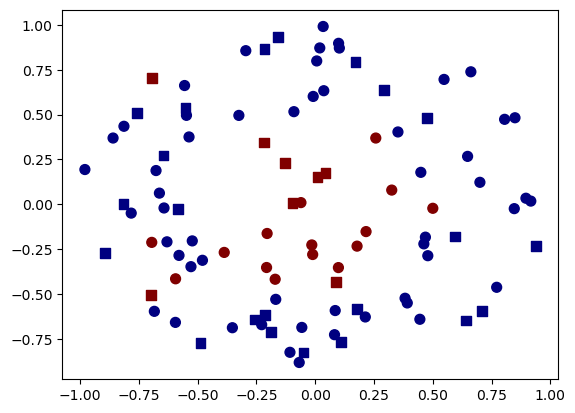

In [45]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=42)

plt.scatter(X_train2[:, 0], X_train2[:, 1], c=y_train2, s=50, cmap='jet')
plt.scatter(X_test2[:, 0], X_test2[:, 1], c=y_test2, marker='s', s=50, cmap='jet');

### Model (Pasting)

In [46]:
base2 = DecisionTreeClassifier(max_depth=3, random_state=42, ccp_alpha=0.01)
pasting_classifier = BaggingClassifier(base_estimator=base2, n_estimators=5, bootstrap=False, max_samples=10, random_state=42)

In [47]:
pasting_classifier.fit(X_train2, y_train2)
pasting_classifier.score(X_test2, y_test2)

D:\anaconda\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.6333333333333333

<Axes: >

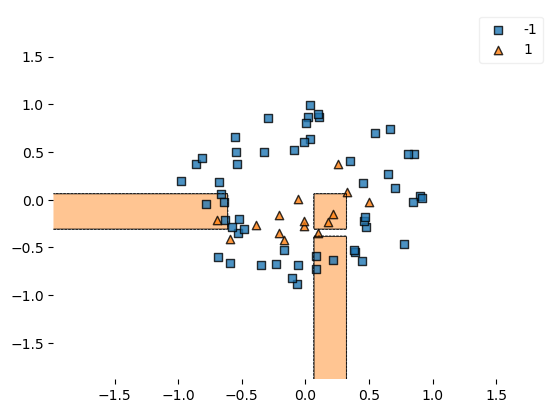

In [48]:
plot_decision_regions(X_train2, y_train2, pasting_classifier)

## Example 3 (Energy Dataset) => Random Forests

### Dataset

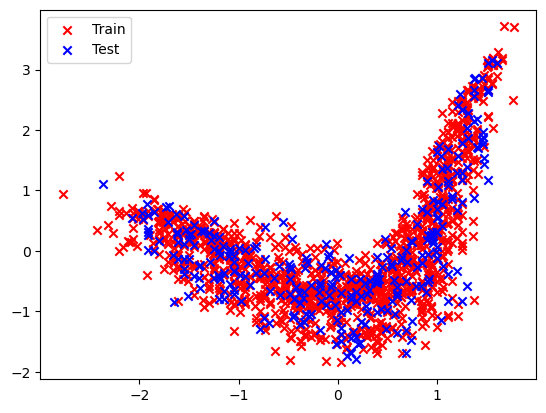

In [49]:
df3 = pd.read_csv('data/energy-train-l.csv').values
X_train3, y_train3 = df3[:, [0]].copy(), df3[:, [1]].copy()

scaler = StandardScaler()

X_train3 = scaler.fit_transform(X_train3)
y_train3 = scaler.fit_transform(y_train3)

df3_test = pd.read_csv('data/energy-test-l.csv').values
X_test3, y_test3 = df3_test[:, [0]].copy(), df3_test[:, [1]].copy()

X_test3 = scaler.transform(X_test3)
y_test3 = scaler.transform(y_test3)

plt.scatter(X_train3, y_train3, c='red', marker='x')
plt.scatter(X_test3, y_test3, c='blue', marker='x')
plt.legend(['Train', 'Test']);

### Model

In [50]:
rf_regressor = RandomForestRegressor(n_estimators=40, max_depth=3)

In [51]:
rf_regressor.fit(X_train3, y_train3)
rf_regressor.score(X_test3, y_test3)

D:\anaconda\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.6590520372516951

In [52]:
xp = np.linspace(X_train3.min(), X_train3.max(), 100)[:, None]
yp = rf_regressor.predict(xp)

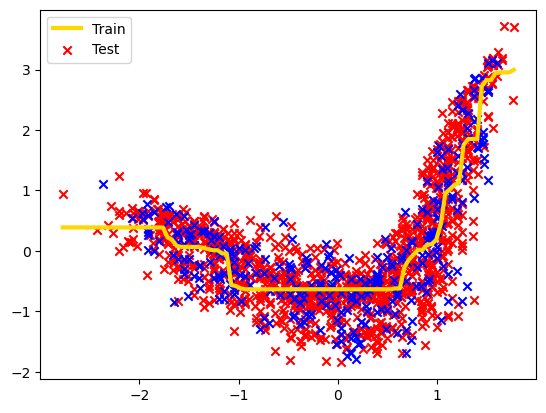

In [53]:
plt.plot(xp, yp, c='gold', linewidth=3)
plt.scatter(X_train3, y_train3, c='red', marker='x')
plt.scatter(X_test3, y_test3, c='blue', marker='x')
plt.legend(['Train', 'Test']);

# Boosting

### LSboot (from scratch)

In [54]:
class LSBoost:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []

    # ***    
    def fit(self, X, y):
        H = np.zeros(len(y)) + np.mean(y)
        for _ in range(self.n_estimators):
            r = y - H
            model = DecisionTreeRegressor(max_depth=1)
            model.fit(X, r)
            h = model.predict(X)
            H += self.learning_rate * h
            self.models.append(model)
            
    def predict(self, X):
        H = np.zeros(len(X))
        for j in range(self.n_estimators):
            h = self.models[j].predict(X)
            H += self.learning_rate * h
        return H

In [55]:
lsboost = LSBoost(n_estimators=150, learning_rate=0.5)

In [56]:
lsboost.fit(X_train3, y_train3[:, 0])

In [57]:
y_hat = lsboost.predict(X_test3)

In [58]:
xp = np.linspace(X_train3.min(), X_train3.max(), 100)[:, None]
yp = lsboost.predict(xp)

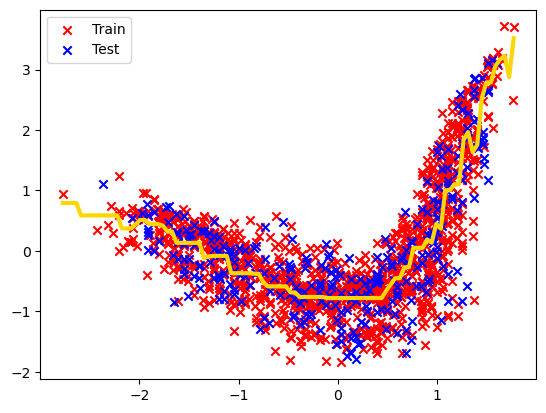

In [59]:
plt.scatter(X_train3, y_train3, c='red', marker='x')
plt.scatter(X_test3, y_test3, c='blue', marker='x')
plt.plot(xp, yp, c='gold', linewidth=3)
plt.legend(['Train', 'Test']);

### AdaBoost (sklearn)

In [60]:
base4 = DecisionTreeClassifier(max_depth=3, ccp_alpha=0.01, random_state=15)

In [61]:
adaboost_classifier = AdaBoostClassifier(base_estimator=base4, n_estimators=10, learning_rate=0.1)

In [62]:
adaboost_classifier.fit(X_train1, y_train1)

D:\anaconda\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.01,
                                                         max_depth=3,
                                                         random_state=15),
                   learning_rate=0.1, n_estimators=10)

In [63]:
adaboost_classifier.score(X_test1, y_test1)

0.8360655737704918

### Gradient Boosting (sklearn)

#### Classifier

In [64]:
gboost_classifier = GradientBoostingClassifier(n_estimators=50, learning_rate=0.3, max_depth=1)

In [65]:
gboost_classifier.fit(X_train2, y_train2)

GradientBoostingClassifier(learning_rate=0.3, max_depth=1, n_estimators=50)

In [66]:
gboost_classifier.score(X_test2, y_test2)

0.9333333333333333

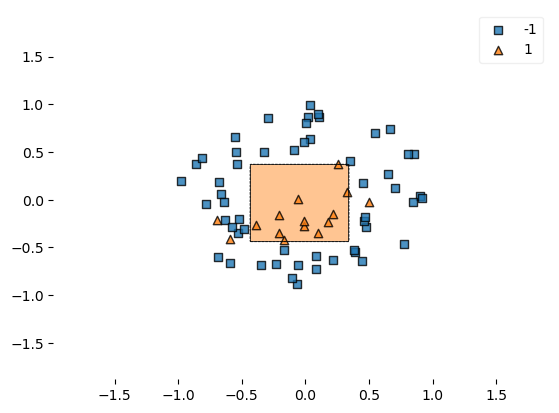

In [67]:
plot_decision_regions(X_train2, y_train2, gboost_classifier);

#### Regressor

In [68]:
gboost_regressor = GradientBoostingRegressor(n_estimators=50, learning_rate=0.2, max_depth=1)

In [69]:
gboost_regressor.fit(X_train3, y_train3)

D:\anaconda\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.2, max_depth=1, n_estimators=50)

In [70]:
y_hat = gboost_regressor.predict(X_test3)

In [71]:
xp = np.linspace(X_train3.min(), X_train3.max(), 100)[:, None]
yp = gboost_regressor.predict(xp)

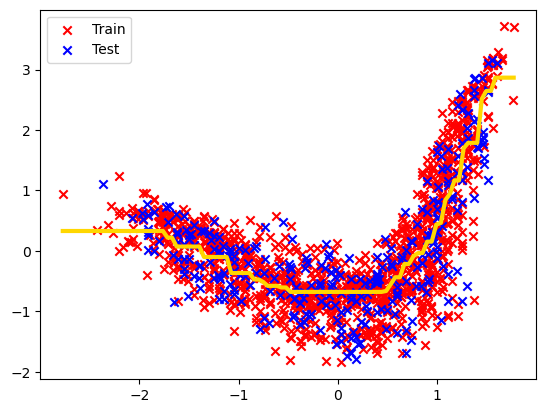

In [72]:
plt.scatter(X_train3, y_train3, c='red', marker='x')
plt.scatter(X_test3, y_test3, c='blue', marker='x')
plt.plot(xp, yp, c='gold', linewidth=3)
plt.legend(['Train', 'Test']);